# Finding JRA55 Antarctic Regional all polynya areas - winter

* **Description**: Plots JRA55 threshold polynya identification maps
* **Input data**: Processed polynya masks from L.Landrum, CCAMLR masks
* **Output data**: Netcdf file with typical polynya masks
* **Creator**: Alice DuVivier
* **Date**: May 2022

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pop_tools
from datetime import timedelta
import glob
import dask
from matplotlib.gridspec import GridSpec
import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import nc_time_axis

import utils

In [2]:
case = 'g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.4p4z.005'

thresh_in_1 = 'hi'
thresh_in_2 = 'hi_0.4m'

data_dir = '/glade/p/cesm/pcwg/landrum/'+case+'/ice/polynyas/monthly/'+thresh_in_1+'/'

fin_1 = case+'.'+thresh_in_2+'thresh.polynya_sh.006201-012212.nc'

In [3]:
data_dir+fin_1

'/glade/p/cesm/pcwg/landrum/g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.4p4z.005/ice/polynyas/monthly/hi/g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.4p4z.005.hi_0.4mthresh.polynya_sh.006201-012212.nc'

In [4]:
ds_1 = xr.open_dataset(data_dir+fin_1,decode_times=True)

In [5]:
# keep just the variable of interest and only first polyID 
#(ncdh on the files shows that it should be only time x lat x lon in shape. Something with python loading?)

polynya_1 = ds_1['polynyas']

In [7]:
polynya_1

<xarray.DataArray 'polynyas' (time: 732, lat: 76, lon: 320)>
[17802240 values with dtype=float64]
Coordinates:
  * time     (time) object 0060-02-01 00:00:00 ... 0121-01-01 00:00:00
Dimensions without coordinates: lat, lon
Attributes:
    long_name:  Polynya grid cells with < 0.4m hi and bounded by hi > 0.4m an...

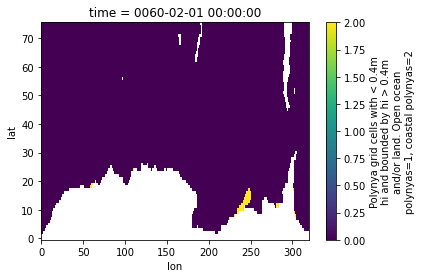

In [8]:
# check data
polynya_1.isel(time=0).plot()

### Set all polynyas to be in mask since there are so few open water polynyas

In [9]:
# In the file, 0=not polynya, 1=open water polynya, 2=coastal polynya
# We only want to look at all polynyas for now, so set coastal to one also
polynya_1 = polynya_1.where(polynya_1 != 2,1)

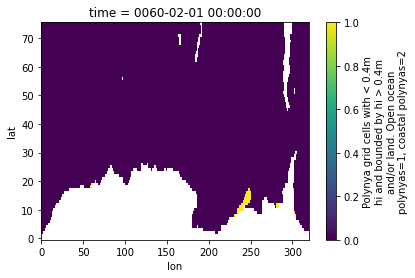

In [10]:
# check data
polynya_1.isel(time=0).plot()

### Fix time array to be useable

In [11]:
polynya_1.time

<xarray.DataArray 'time' (time: 732)>
array([cftime.DatetimeNoLeap(60, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(60, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(60, 4, 1, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(120, 11, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(120, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(121, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0060-02-01 00:00:00 ... 0121-01-01 00:00:00
Attributes:
    long_name:     model time
    bounds:        time_bounds
    cell_methods:  time: mean

In [12]:
# make array of the dates
dates = pd.date_range(start="1960-01-01", end="2020-12-31", freq="M")

In [13]:
len(dates)

732

In [14]:
# reassign the time array
polynya_1['time'] = dates

In [15]:
polynya_1.time.dt.month

<xarray.DataArray 'month' (time: 732)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
...
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12])
Coordinates:
  * time     (time) datetime64[ns] 1960-01-31 1960-02-29 ... 2020-12-31

## Get just winter months - JAS

In [16]:
polynya_winter_1 = polynya_1.where((polynya_1.time.dt.month >= 7) & (polynya_1.time.dt.month <= 9), drop=True)

In [17]:
polynya_winter_1.time

<xarray.DataArray 'time' (time: 183)>
array(['1960-07-31T00:00:00.000000000', '1960-08-31T00:00:00.000000000',
       '1960-09-30T00:00:00.000000000', '1961-07-31T00:00:00.000000000',
       '1961-08-31T00:00:00.000000000', '1961-09-30T00:00:00.000000000',
       '1962-07-31T00:00:00.000000000', '1962-08-31T00:00:00.000000000',
       '1962-09-30T00:00:00.000000000', '1963-07-31T00:00:00.000000000',
       '1963-08-31T00:00:00.000000000', '1963-09-30T00:00:00.000000000',
       '1964-07-31T00:00:00.000000000', '1964-08-31T00:00:00.000000000',
       '1964-09-30T00:00:00.000000000', '1965-07-31T00:00:00.000000000',
       '1965-08-31T00:00:00.000000000', '1965-09-30T00:00:00.000000000',
       '1966-07-31T00:00:00.000000000', '1966-08-31T00:00:00.000000000',
       '1966-09-30T00:00:00.000000000', '1967-07-31T00:00:00.000000000',
       '1967-08-31T00:00:00.000000000', '1967-09-30T00:00:00.000000000',
       '1968-07-31T00:00:00.000000000', '1968-08-31T00:00:00.000000000',
       '1968-09-30T00:00:00.000000000', '1969-07-31T00:00:00.000000000',
       '1969-08-31T00:00:00.000000000', '1969-09-30T00:00:00.000000000',
       '1970-07-31T00:00:00.000000000', '1970-08-31T00:00:00.000000000',
       '1970-09-30T00:00:00.000000000', '1971-07-31T00:00:00.000000000',
       '1971-08-31T00:00:00.000000000', '1971-09-30T00:00:00.000000000',
       '1972-07-31T00:00:00.000000000', '1972-08-31T00:00:00.000000000',
       '1972-09-30T00:00:00.000000000', '1973-07-31T00:00:00.000000000',
       '1973-08-31T00:00:00.000000000', '1973-09-30T00:00:00.000000000',
       '1974-07-31T00:00:00.000000000', '1974-08-31T00:00:00.000000000',
       '1974-09-30T00:00:00.000000000', '1975-07-31T00:00:00.000000000',
       '1975-08-31T00:00:00.000000000', '1975-09-30T00:00:00.000000000',
       '1976-07-31T00:00:00.000000000', '1976-08-31T00:00:00.000000000',
       '1976-09-30T00:00:00.000000000', '1977-07-31T00:00:00.000000000',
       '1977-08-31T00:00:00.000000000', '1977-09-30T00:00:00.000000000',
       '1978-07-31T00:00:00.000000000', '1978-08-31T00:00:00.000000000',
       '1978-09-30T00:00:00.000000000', '1979-07-31T00:00:00.000000000',
       '1979-08-31T00:00:00.000000000', '1979-09-30T00:00:00.000000000',
       '1980-07-31T00:00:00.000000000', '1980-08-31T00:00:00.000000000',
       '1980-09-30T00:00:00.000000000', '1981-07-31T00:00:00.000000000',
       '1981-08-31T00:00:00.000000000', '1981-09-30T00:00:00.000000000',
       '1982-07-31T00:00:00.000000000', '1982-08-31T00:00:00.000000000',
       '1982-09-30T00:00:00.000000000', '1983-07-31T00:00:00.000000000',
       '1983-08-31T00:00:00.000000000', '1983-09-30T00:00:00.000000000',
       '1984-07-31T00:00:00.000000000', '1984-08-31T00:00:00.000000000',
       '1984-09-30T00:00:00.000000000', '1985-07-31T00:00:00.000000000',
       '1985-08-31T00:00:00.000000000', '1985-09-30T00:00:00.000000000',
       '1986-07-31T00:00:00.000000000', '1986-08-31T00:00:00.000000000',
       '1986-09-30T00:00:00.000000000', '1987-07-31T00:00:00.000000000',
       '1987-08-31T00:00:00.000000000', '1987-09-30T00:00:00.000000000',
       '1988-07-31T00:00:00.000000000', '1988-08-31T00:00:00.000000000',
       '1988-09-30T00:00:00.000000000', '1989-07-31T00:00:00.000000000',
       '1989-08-31T00:00:00.000000000', '1989-09-30T00:00:00.000000000',
       '1990-07-31T00:00:00.000000000', '1990-08-31T00:00:00.000000000',
       '1990-09-30T00:00:00.000000000', '1991-07-31T00:00:00.000000000',
       '1991-08-31T00:00:00.000000000', '1991-09-30T00:00:00.000000000',
       '1992-07-31T00:00:00.000000000', '1992-08-31T00:00:00.000000000',
       '1992-09-30T00:00:00.000000000', '1993-07-31T00:00:00.000000000',
       '1993-08-31T00:00:00.000000000', '1993-09-30T00:00:00.000000000',
       '1994-07-31T00:00:00.000000000', '1994-08-31T00:00:00.000000000',
       '1994-09-30T00:00:00.000000000', '1995-07-31T00:00:00.000000000',
       '1995-08-31T00:00:00.000000000', '1995-09-30T00:00:00.000000000',
       '1996-07-31T0

## Calculate typical polynya regions over all times

In [18]:
# calculate percent over all times
total_time = len(polynya_1.time)
winter_time = len(polynya_winter_1.time)

pct_all = polynya_1.sum(dim='time')/total_time
pct_winter = polynya_winter_1.sum(dim='time')/winter_time

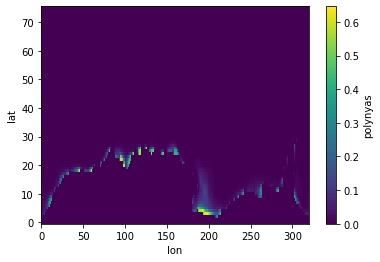

In [19]:
pct_all.plot()

In [20]:
# make an array of "typical" polynyas
# define this as when polynyas happen >10% of the total time

# make array to fill
polynya_typical_all = pct_all.where(pct_all == 1, other = 1)
polynya_typical_winter = pct_winter.where(pct_winter == 1, other = 1)

# keep values where polynyas > 10% (0.1) of the time (reduce the frequency for other masks)
polynya_typical_all = polynya_typical_all.where(pct_all >= 0.1)
polynya_typical_winter = polynya_typical_winter.where(pct_winter >= 0.1)


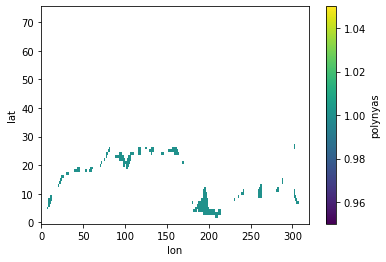

In [21]:
polynya_typical_all.plot()

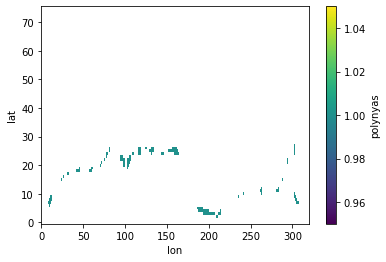

In [22]:
polynya_typical_winter.plot()

In [23]:
polynya_typical_all

<xarray.DataArray 'polynyas' (lat: 76, lon: 320)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: lat, lon

## Get grid data

In [25]:
# get pop grid grid cell areas
grid = pop_tools.get_grid('POP_gx1v7')
grid

# convert tarea to m^2
tarea = grid['TAREA']/(1e4)
tarea = tarea.rename({'nlat':'lat','nlon': 'lon'})

# get lat and lon
TLAT = grid['TLAT']
TLAT = TLAT.rename({'nlat':'lat','nlon': 'lon'})
TLONG = grid['TLONG']
TLONG = TLONG.rename({'nlat':'lat','nlon': 'lon'})

/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


In [26]:
# Drop latitudes greater than what was in polynya files so that array sizes match.
TLAT_sub = TLAT.isel(lat=slice(0,76))
TLONG_sub = TLONG.isel(lat=slice(0,76))

## Save the typical polynya mask as a netcdf

In [27]:
print(polynya_typical_all.shape)
print(polynya_typical_winter.shape)

(76, 320)
(76, 320)


In [28]:
polynya_typical_all

<xarray.DataArray 'polynyas' (lat: 76, lon: 320)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: lat, lon

In [29]:
polynya_typical_winter

<xarray.DataArray 'polynyas' (lat: 76, lon: 320)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: lat, lon

In [30]:
ds_to_save = xr.Dataset({'polynya_typical_all':(['lat','lon'],polynya_typical_all.data),
                         'polynya_typical_winter':(['lat','lon'],polynya_typical_winter.data),
                         'TLAT_sub':(['lat','lon'],TLAT_sub.data),
                         'TLONG_sub':(['lat','lon'],TLONG_sub.data)},
                        attrs={'Author':'Alice DuVivier'})

In [31]:
ds_to_save

<xarray.Dataset>
Dimensions:                 (lat: 76, lon: 320)
Dimensions without coordinates: lat, lon
Data variables:
    polynya_typical_all     (lat, lon) float64 nan nan nan nan ... nan nan nan
    polynya_typical_winter  (lat, lon) float64 nan nan nan nan ... nan nan nan
    TLAT_sub                (lat, lon) float64 -79.22 -79.22 ... -39.15 -39.15
    TLONG_sub               (lat, lon) float64 320.6 321.7 322.8 ... 318.3 319.4
Attributes:
    Author:   Alice DuVivier

In [32]:
# set output name and save file
fout = 'jra55_typical_polynya_mask_'+thresh_in_2+'thresh'

ds_to_save.to_netcdf(fout+'.nc')  # how to save file
